In [1]:
import pygimli as pg
import pygimli.meshtools as mt
import math
from pygimli.viewer import showMesh
from pygimli.viewer.mpl import drawStreams
import numpy as np
import matplotlib.pyplot as plt

Mesh: Nodes: 65 Cells: 0 Boundaries: 66
Mesh: Nodes: 14573 Cells: 28726 Boundaries: 43298


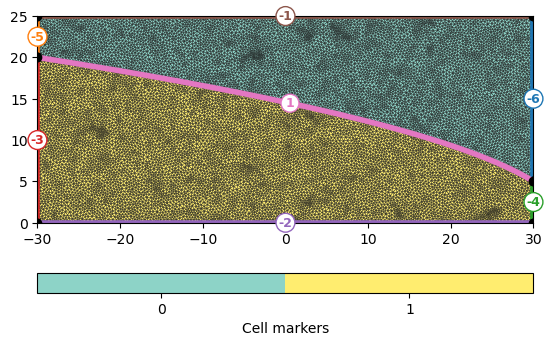

In [67]:
left = -30
right = 30
total_depth = 25

depth_h_left = 5
depth_h_right = 20

b = 0
h_left = total_depth - depth_h_left
h_right = total_depth - depth_h_right

world = mt.createWorld(start = [left,total_depth], end = [right, 0])

# line = mt.createLine(start=[left, 20], end=[right, 15])

def water_table_pos(x):
    return (h_left**2-(h_left**2-h_right**2)/(right-left)*x)**0.5

wt_coords = []
for i in range(right-left+1):
    wt_coords.append([i+left, water_table_pos(i)])

wt = mt.createPolygon(wt_coords)

geometry = world + wt

print(geometry)

mesh = mt.createMesh(geometry, quality = 34, area = 0.1, smooth = True)
print(mesh)





for bound in mesh.boundaries():
    x = bound.center().x()
    y = bound.center().y()
    if x == mesh.xmin():
        if y<h_left:
            bound.setMarker(-3)
        else:
            bound.setMarker(-5)
    elif x == mesh.xmax():
        if y<h_right:
            bound.setMarker(-4)
        else:
            bound.setMarker(-6)

pg.show(mesh, markers = True, showMesh = True);

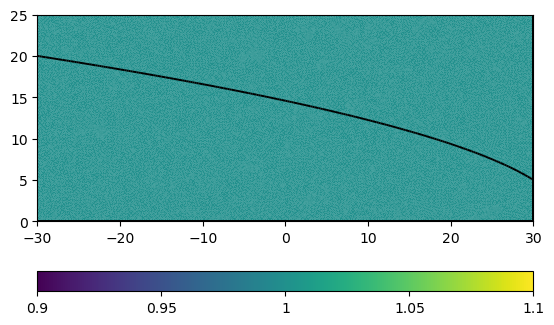

In [68]:
amap = [[0, 1], [1, 1.0]]
showMesh(mesh, amap);

Mesh:  Mesh: Nodes: 14573 Cells: 28726 Boundaries: 43298
Assembling time:  0.194
Solving time:  0.214


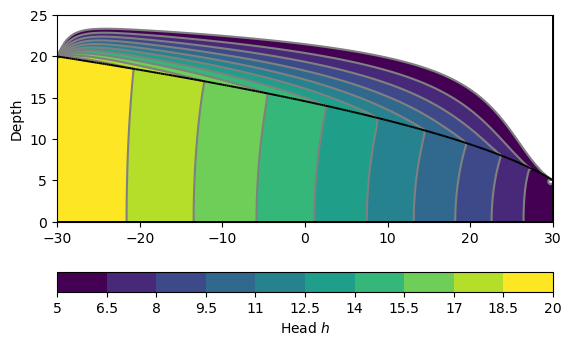

In [69]:
gamma = 9.8

dirichletBC = { -1: 0,
                 1: lambda boundary: abs(boundary.center()[1]),
                -3: 20,
                -4: 5,
                -5: 0,
                -6: 0}

# NeumannBC = {1: 0}

# RobinBN = {1: [0,0]}

h = pg.solve(mesh, a = amap, bc={'Dirichlet': dirichletBC}, verbose = True)
ax, cbar = showMesh(mesh, data=h, label='Head $h$', cMin=5, cMax=20, nLevs=11, showBoundary=True)
ax.set_ylabel('Depth');

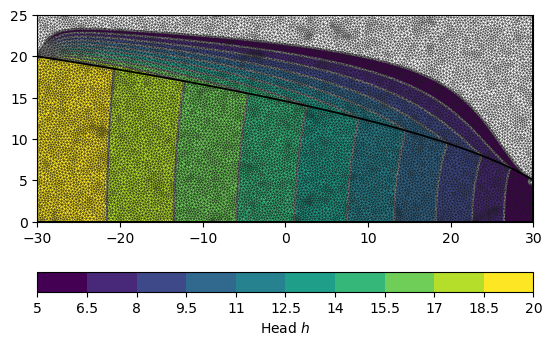

In [71]:
ax, cb = showMesh(mesh, data=h, label='Head $h$', cMin=5, cMax=20, nLevs=11, showBoundary=True, showMesh=True)
# drawStreams(ax, mesh, pg.solver.grad(mesh, -h), quiver = True)

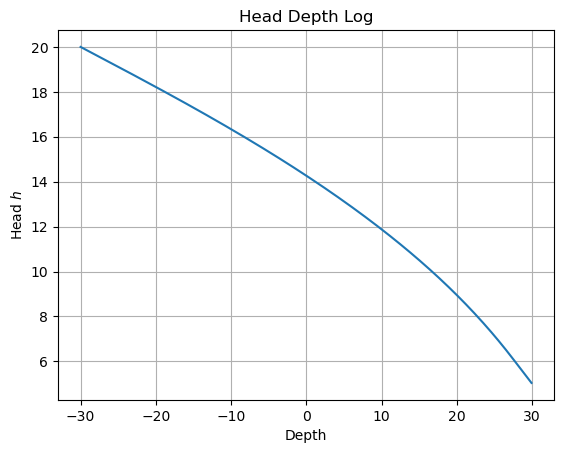

In [72]:
depth = np.arange(-30, 30, 0.1)
pos = [[d, 3] for d in depth]
hlog = pg.interpolate(mesh, h, pos)
fig, ax = plt.subplots()
ax.plot(depth, hlog)
# ax.set_ylim([max(depth), 0])
ax.set_title('Head Depth Log')
ax.set_xlabel('Depth')
ax.set_ylabel('Head $h$')
ax.grid(True)